# Experiment 4

This experiment comprises of 4 experiments:
1. We randomly choose half of the skyrmions for training and the other half for testing
2. We use the upper half for trainig and the lower half for testing (and vice versa)
3. We randomly choose one third of the skyrmions for training and use the other two for testing
4. We use the upper third for training and the middle and lower thirds for testing (and all the other possible combinations)

In [6]:
import pandas as pd
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

# import functions
import sys
sys.path.insert(0, '../')
from my_functions import *

In [21]:
data = pd.read_csv('../../data/processed/trajectories.csv')
no_skyrmions = data[data['frame'] == 0].shape[0]
directory = '../../data/raw/'

## Part 1

In [22]:
ids = list(range(0, no_skyrmions))

train_ids = random.sample(ids, k=7)
train_ids.sort()
ids = [x for x in ids if x not in train_ids]

test_ids = random.sample(ids, k=7)
test_ids.sort()

train_data = data[data['particle'].isin(train_ids)]
test_data = data[data['particle'].isin(test_ids)]

**Train data**


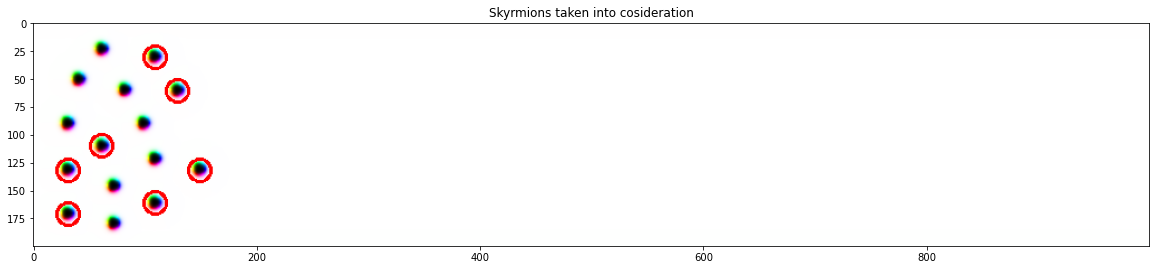

**Test data**


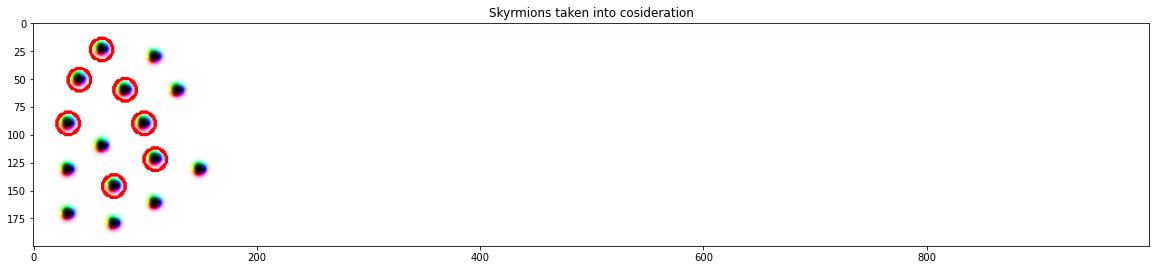

In [23]:
print('**Train data**')
show_tracked(train_data, directory)
print('**Test data**')
show_tracked(test_data, directory)

In [24]:
train_frames = get_frames(train_data)
test_frames = get_frames(test_data)

X_train, y_train = frames_to_xy(train_frames)
X_test, y_test = frames_to_xy(test_frames)

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:03<00:00, 250.10it/s]


In [25]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print('The model performance for X_train')
y_predict_train = evaluate(X_train, y_train, lin_model)

print('The model performance for X_test')
y_predict_test = evaluate(X_test, y_test, lin_model)

The model performance for X_train
--------------------------------------
RMSE is 3.5653834549981283
R2 score is 0.9828680916780689


The model performance for X_test
--------------------------------------
RMSE is 11.560842017159347
R2 score is 0.9231995607228255




In [26]:
pred_train_df = get_predictions_df(y_predict_train, train_ids)
pred_test_df = get_predictions_df(y_predict_test, test_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:06<00:00, 124.05it/s]


In [27]:
print(f'Train ids: {train_ids}')

Train ids: [1, 4, 7, 9, 10, 12, 13]


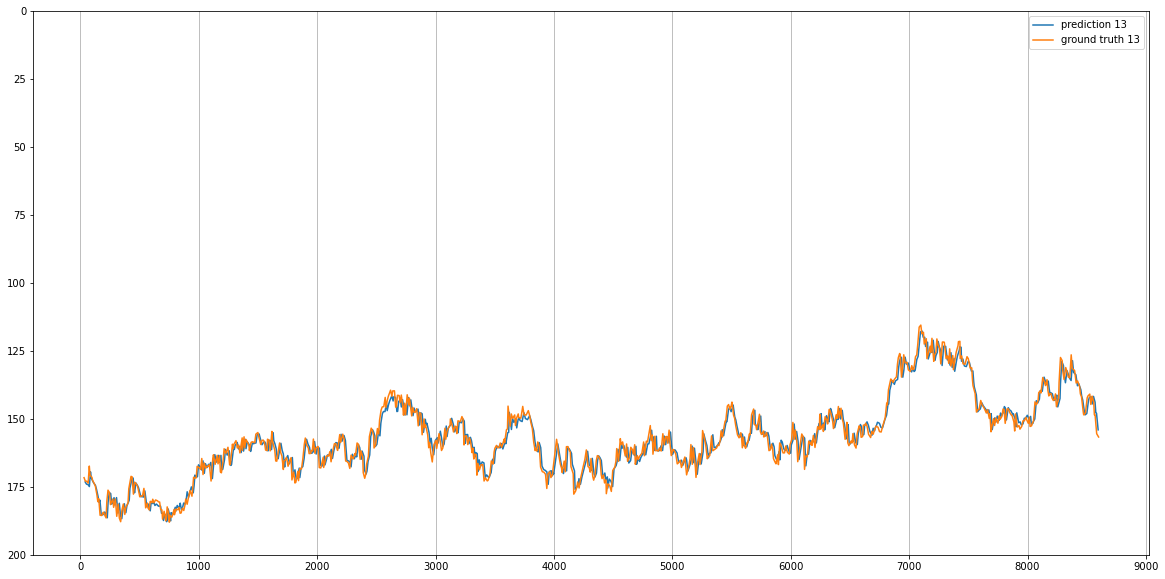

In [28]:
plot_prediction(data, pred_train_df, ids=[train_ids[-1]])

In [29]:
print(f'Test ids: {test_ids}')

Test ids: [0, 2, 3, 5, 6, 8, 11]


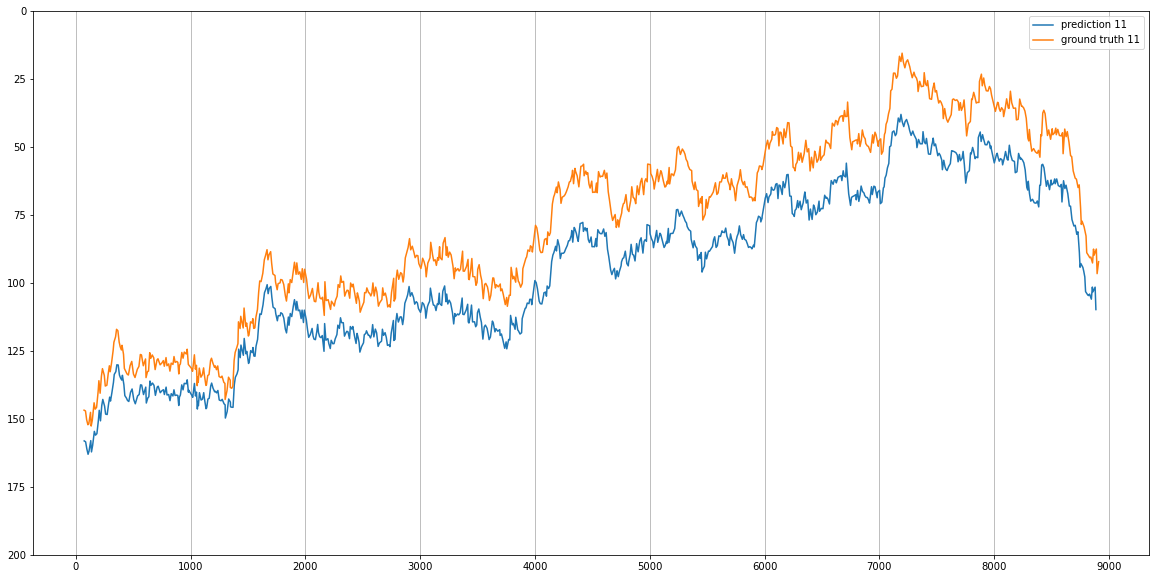

In [30]:
plot_prediction(data, pred_test_df, ids=[test_ids[-1]])

## Part 2

In [31]:
train_ids = data[data['frame'] == 0].nlargest(7, 'y')['particle'].tolist()
test_ids = data[data['frame'] == 0].nsmallest(7, 'y')['particle'].tolist()

train_ids.sort()
test_ids.sort()

train_data = data[data['particle'].isin(train_ids)]
test_data = data[data['particle'].isin(test_ids)]

**Train data**


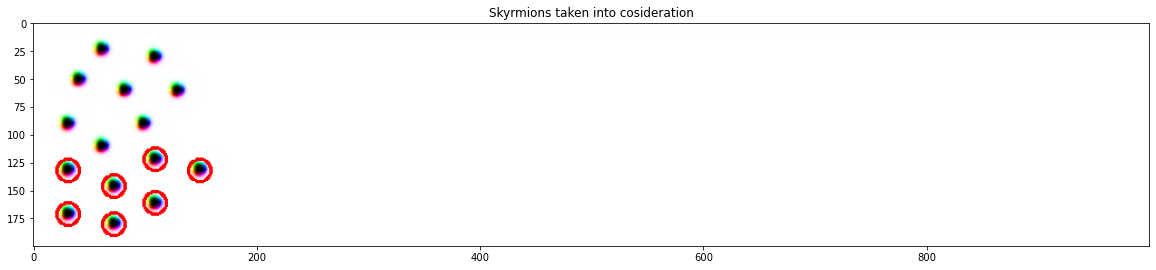

**Test data**


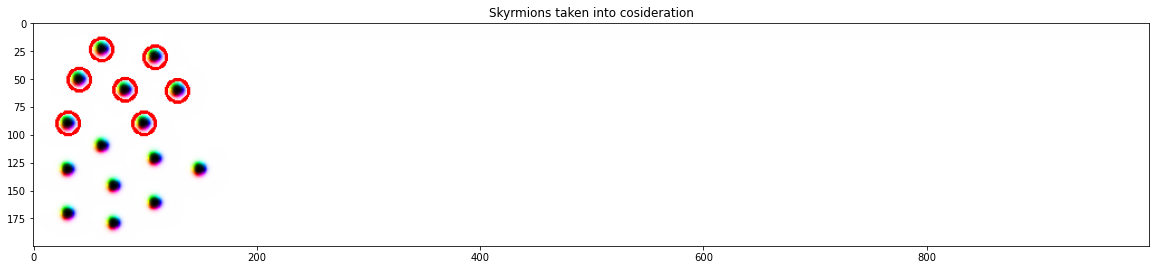

In [32]:
print('**Train data**')
show_tracked(train_data, directory)
print('**Test data**')
show_tracked(test_data, directory)

In [33]:
train_frames = get_frames(train_data)
test_frames = get_frames(test_data)

X_train, y_train = frames_to_xy(train_frames)
X_test, y_test = frames_to_xy(test_frames)

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:03<00:00, 244.73it/s]


In [34]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print('The model performance for X_train')
y_predict_train = evaluate(X_train, y_train, lin_model)

print('The model performance for X_test')
y_predict_test = evaluate(X_test, y_test, lin_model)

The model performance for X_train
--------------------------------------
RMSE is 3.5031610859735465
R2 score is 0.984826908505804


The model performance for X_test
--------------------------------------
RMSE is 11.126207357629792
R2 score is 0.853651633649081




In [35]:
pred_train_df = get_predictions_df(y_predict_train, train_ids)
pred_test_df = get_predictions_df(y_predict_test, test_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:06<00:00, 125.97it/s]


In [36]:
print(f'Train ids: {train_ids}')

Train ids: [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]


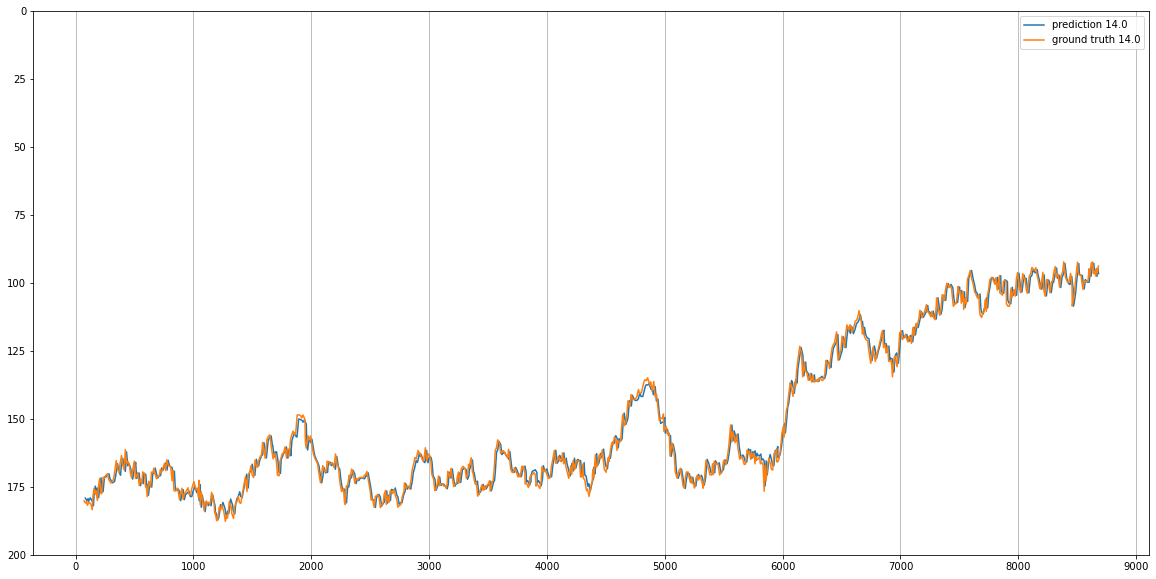

In [37]:
plot_prediction(data, pred_train_df, ids=[train_ids[-1]])

In [38]:
print(f'Test ids: {test_ids}')

Test ids: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


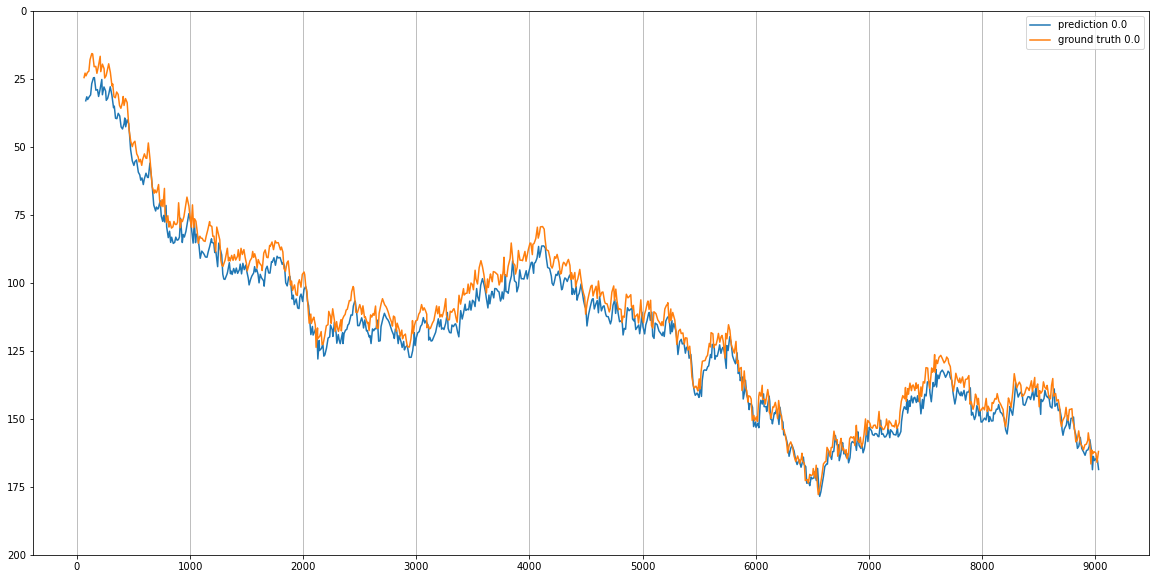

In [39]:
plot_prediction(data, pred_test_df, ids=[test_ids[0]])

## Part 3

In [40]:
ids = list(range(0, no_skyrmions))

train_ids = random.sample(ids, k=5)
train_ids.sort()
ids = [x for x in ids if x not in train_ids]

test_1_ids = random.sample(ids, k=5)
test_1_ids.sort()
ids = [x for x in ids if x not in test_1_ids]

test_2_ids = ids
test_2_ids.sort()

**Train data**


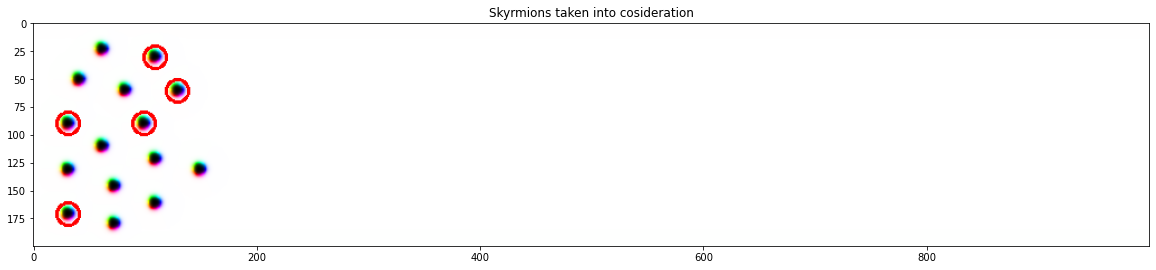

**Test data 1**


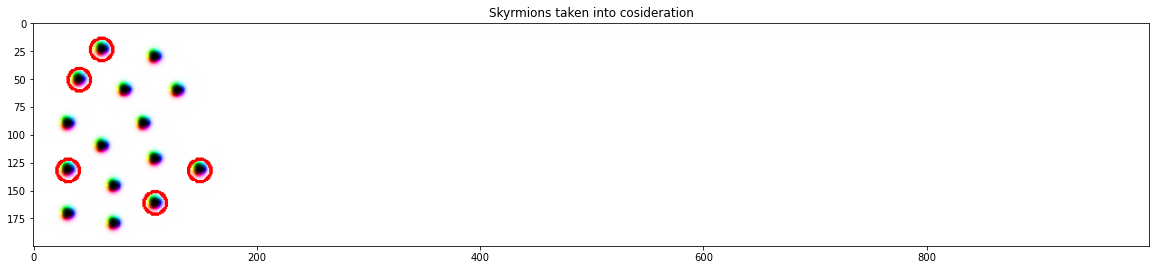

**Test data 2**


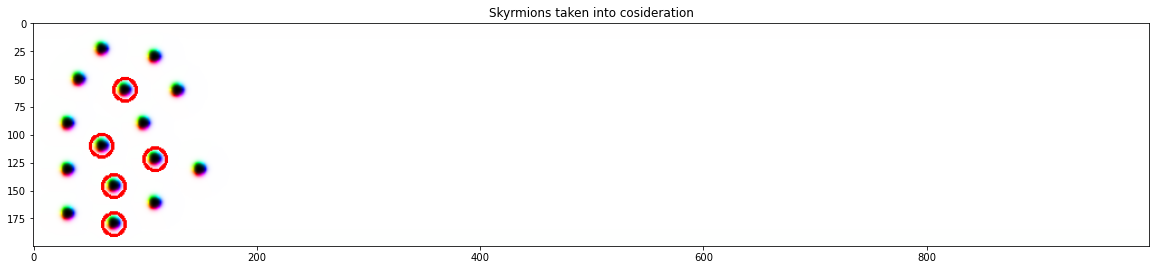

In [41]:
train_data = data[data['particle'].isin(train_ids)]
test_1_data = data[data['particle'].isin(test_1_ids)]
test_2_data = data[data['particle'].isin(test_2_ids)]

print('**Train data**')
show_tracked(train_data, directory)
print('**Test data 1**')
show_tracked(test_1_data, directory)
print('**Test data 2**')
show_tracked(test_2_data, directory)

In [42]:
train_frames = get_frames(train_data)
test_1_frames = get_frames(test_1_data)
test_2_frames = get_frames(test_2_data)

X_train, y_train = frames_to_xy(train_frames)
X_1_test, y_1_test = frames_to_xy(test_1_frames)
X_2_test, y_2_test = frames_to_xy(test_2_frames)

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:02<00:00, 324.07it/s]


In [43]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print("The model performance for training set")
train_pred = evaluate(X_train, y_train, lin_model)

print("The model performance for testing set 1")
test_1_pred = evaluate(X_1_test, y_1_test, lin_model)

print("The model performance for testing set 2")
test_2_pred = evaluate(X_2_test, y_2_test, lin_model)

The model performance for training set
--------------------------------------
RMSE is 3.5676984881747424
R2 score is 0.9854910487403818


The model performance for testing set 1
--------------------------------------
RMSE is 7.982043855172443
R2 score is 0.9491873912546651


The model performance for testing set 2
--------------------------------------
RMSE is 11.865521806256778
R2 score is 0.9527177606571297




In [44]:
pred_train_df = get_predictions_df(train_pred, train_ids)
pred_test_1_df = get_predictions_df(test_1_pred, test_1_ids)
pred_test_2_df = get_predictions_df(test_2_pred, test_2_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:04<00:00, 171.11it/s]


In [45]:
print(f'Train ids: {train_ids}')

Train ids: [1, 4, 5, 6, 13]


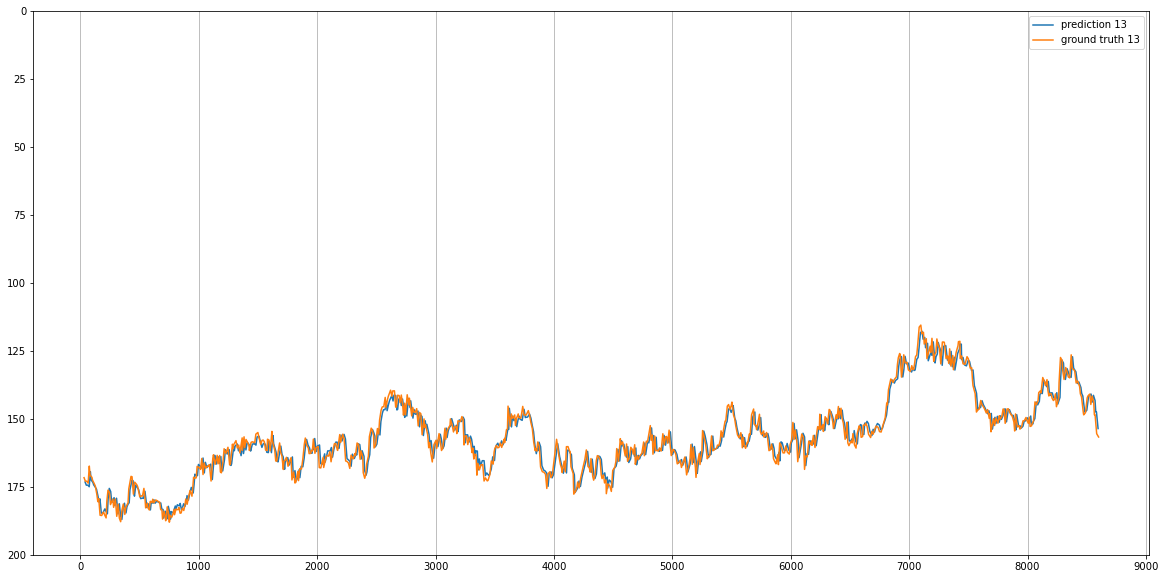

In [46]:
plot_prediction(data, pred_train_df, ids=[train_ids[-1]])

In [47]:
print(f'Test 1 ids: {test_1_ids}')

Test 1 ids: [0, 2, 9, 10, 12]


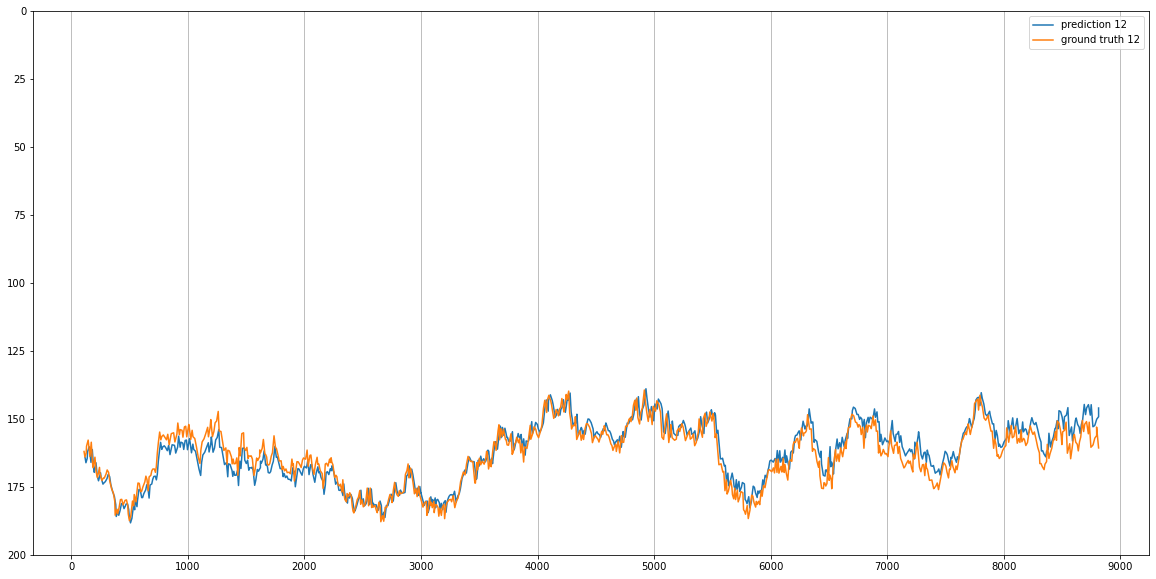

In [48]:
plot_prediction(data, pred_test_1_df, ids=[test_1_ids[-1]])

In [49]:
print(f'Test 2 ids: {test_2_ids}')

Test 2 ids: [3, 7, 8, 11, 14]


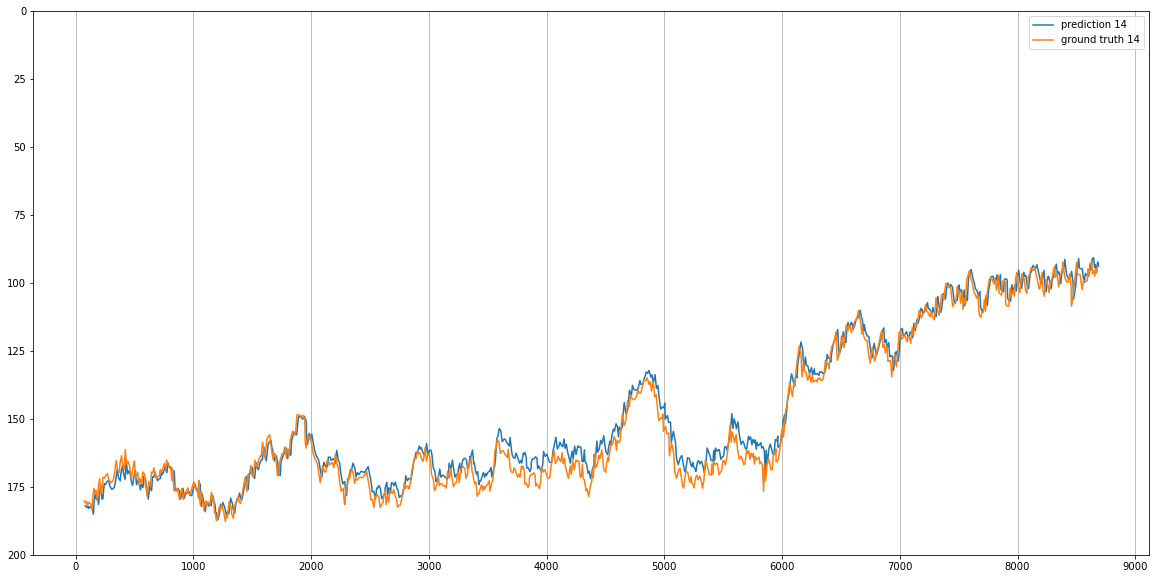

In [50]:
plot_prediction(data, pred_test_2_df, ids=[test_2_ids[-1]])

## Part 4

In [53]:
ids = list(range(0, no_skyrmions))

top_ids = data[data['frame'] == 0].nsmallest(5, 'y')['particle'].tolist()
bottom_ids = data[data['frame'] == 0].nlargest(5, 'y')['particle'].tolist()
centre_ids = [x for x in ids if x not in top_ids and x not in bottom_ids]

top_ids.sort()
bottom_ids.sort()
centre_ids.sort()

top_data = data[data['particle'].isin(top_ids)]
centre_data = data[data['particle'].isin(centre_ids)]
bottom_data = data[data['particle'].isin(bottom_ids)]

**Top data**


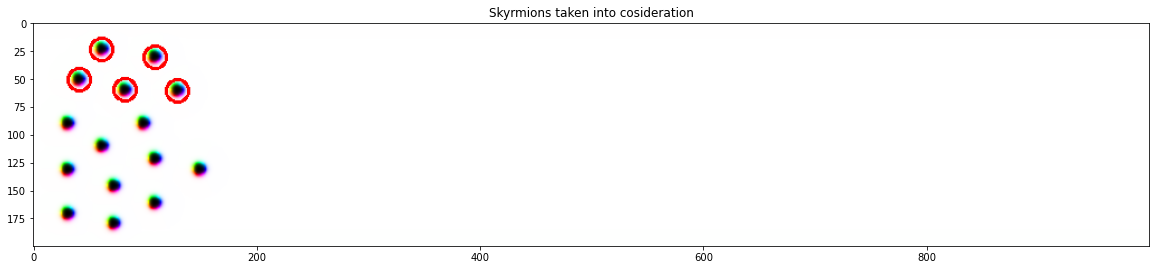

**Centre data**


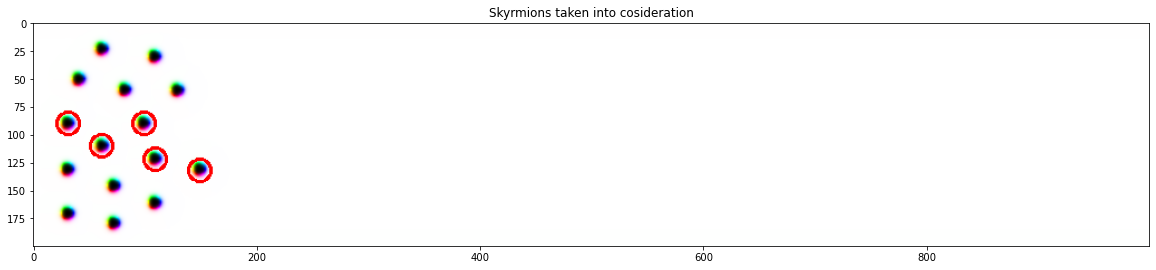

**Bottom data**


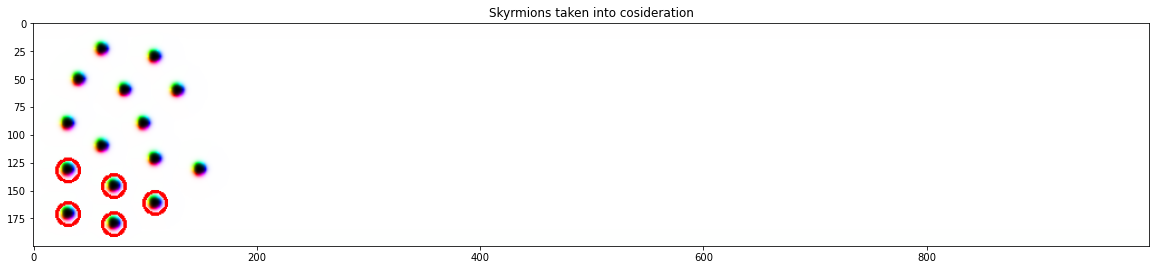

In [54]:
print('**Top data**')
show_tracked(top_data, directory)
print('**Centre data**')
show_tracked(centre_data, directory)
print('**Bottom data**')
show_tracked(bottom_data, directory)

In [55]:
top_frames = get_frames(top_data)
centre_frames = get_frames(centre_data)
bottom_frames = get_frames(bottom_data)

X_top, y_top = frames_to_xy(top_frames)
X_centre, y_centre = frames_to_xy(centre_frames)
X_bottom, y_bottom = frames_to_xy(bottom_frames)

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:02<00:00, 338.01it/s]


**Train on top**

In [56]:
lin_model = LinearRegression()
lin_model.fit(X_top, y_top)

print("The model performance for training set (top)")
top_pred = evaluate(X_top, y_top, lin_model)

print("The model performance for testing set (centre)")
centre_pred = evaluate(X_centre, y_centre, lin_model)

print("The model performance for testing set (bottom)")
bottom_pred = evaluate(X_bottom, y_bottom, lin_model)

The model performance for training set (top)
--------------------------------------
RMSE is 3.5384109586777526
R2 score is 0.9879133046376237


The model performance for testing set (centre)
--------------------------------------
RMSE is 8.366081179129846
R2 score is 0.9525343555656185


The model performance for testing set (bottom)
--------------------------------------
RMSE is 8.480387930207186
R2 score is 0.9032439896627167




In [57]:
pred_top_df = get_predictions_df(top_pred, top_ids)
pred_centre_df = get_predictions_df(centre_pred, centre_ids)
pred_bottom_df = get_predictions_df(bottom_pred, bottom_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:04<00:00, 178.29it/s]


In [58]:
print(f'Top ids: {top_ids}')

Top ids: [0.0, 1.0, 2.0, 3.0, 4.0]


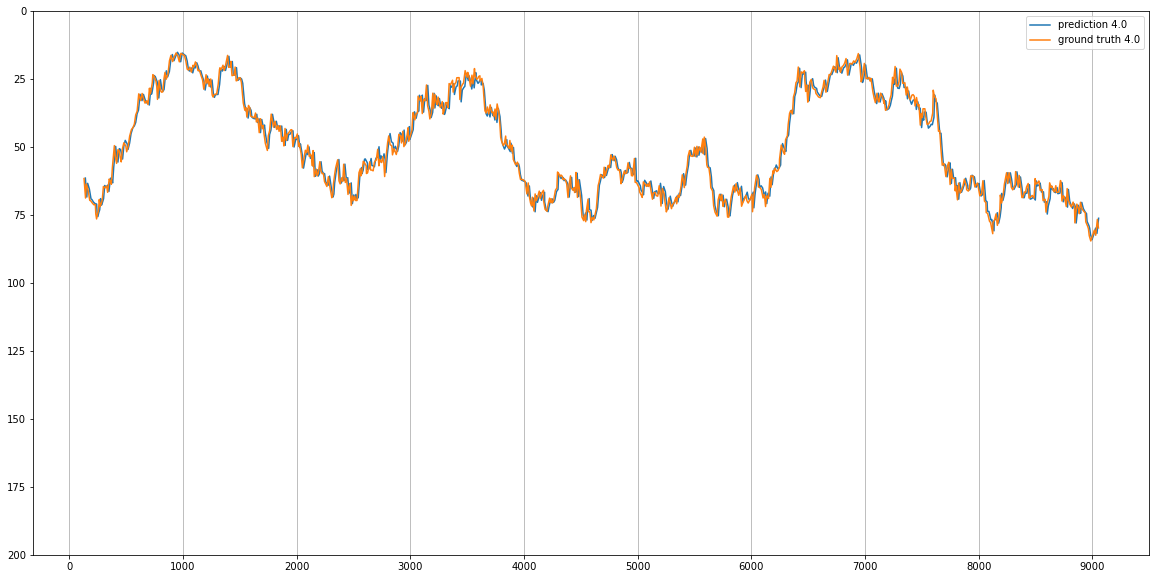

In [59]:
plot_prediction(data, pred_top_df, ids=[top_ids[-1]])

In [60]:
print(f'Centre ids: {centre_ids}')

Centre ids: [5, 6, 7, 8, 10]


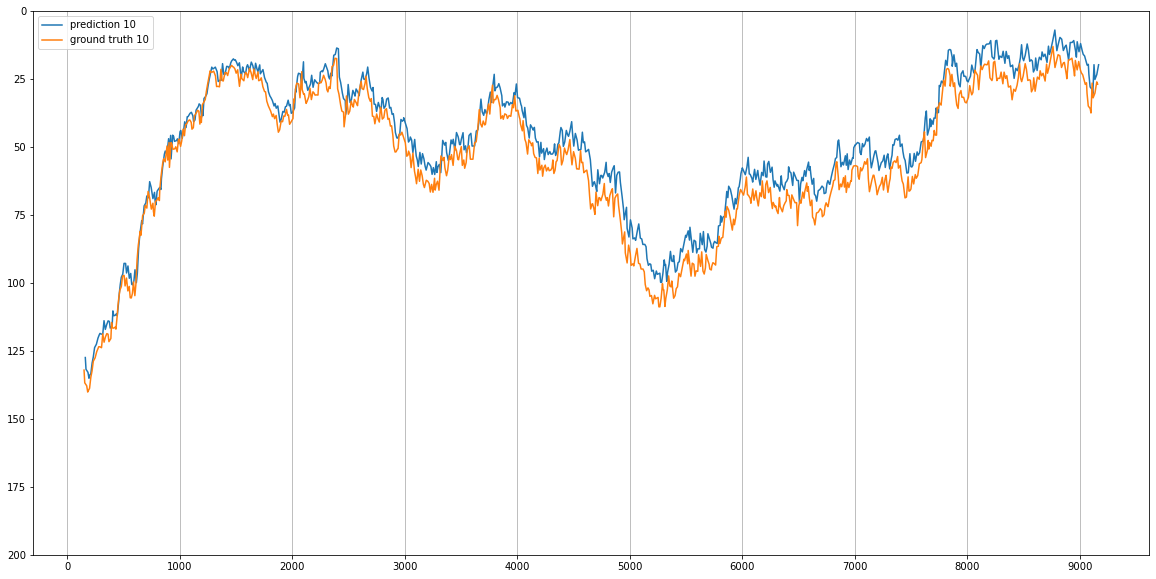

In [61]:
plot_prediction(data, pred_centre_df, ids=[centre_ids[-1]])

In [62]:
print(f'Bottom ids: {bottom_ids}')

Bottom ids: [9.0, 11.0, 12.0, 13.0, 14.0]


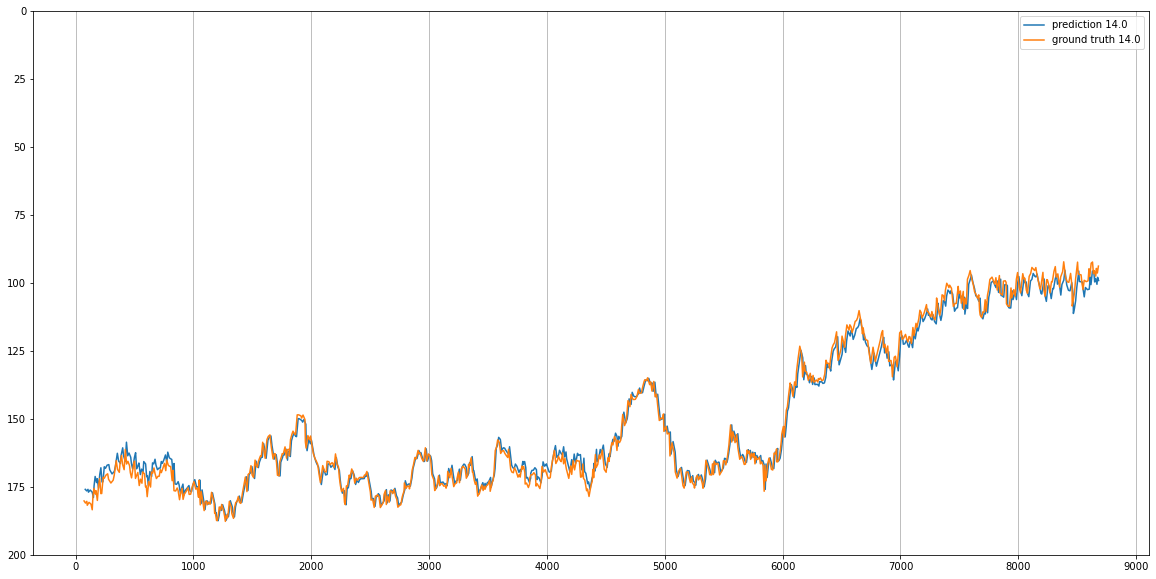

In [63]:
plot_prediction(data, pred_bottom_df, ids=[bottom_ids[-1]])

**Train on centre**

In [64]:
lin_model = LinearRegression()
lin_model.fit(X_centre, y_centre)

print("The model performance for training set (centre)")
centre_pred = evaluate(X_centre, y_centre, lin_model)

print("The model performance for testing set (top)")
top_pred = evaluate(X_top, y_top, lin_model)

print("The model performance for testing set (bottom)")
bottom_pred = evaluate(X_bottom, y_bottom, lin_model)

The model performance for training set (centre)
--------------------------------------
RMSE is 3.6086960518466973
R2 score is 0.9915238403916924


The model performance for testing set (top)
--------------------------------------
RMSE is 11.761901504967417
R2 score is 0.8922935750143237


The model performance for testing set (bottom)
--------------------------------------
RMSE is 11.146758236691348
R2 score is 0.9305108391187005




In [65]:
pred_top_df = get_predictions_df(top_pred, top_ids)
pred_centre_df = get_predictions_df(centre_pred, centre_ids)
pred_bottom_df = get_predictions_df(bottom_pred, bottom_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:04<00:00, 173.91it/s]


In [66]:
print(f'Centre ids: {centre_ids}')

Centre ids: [5, 6, 7, 8, 10]


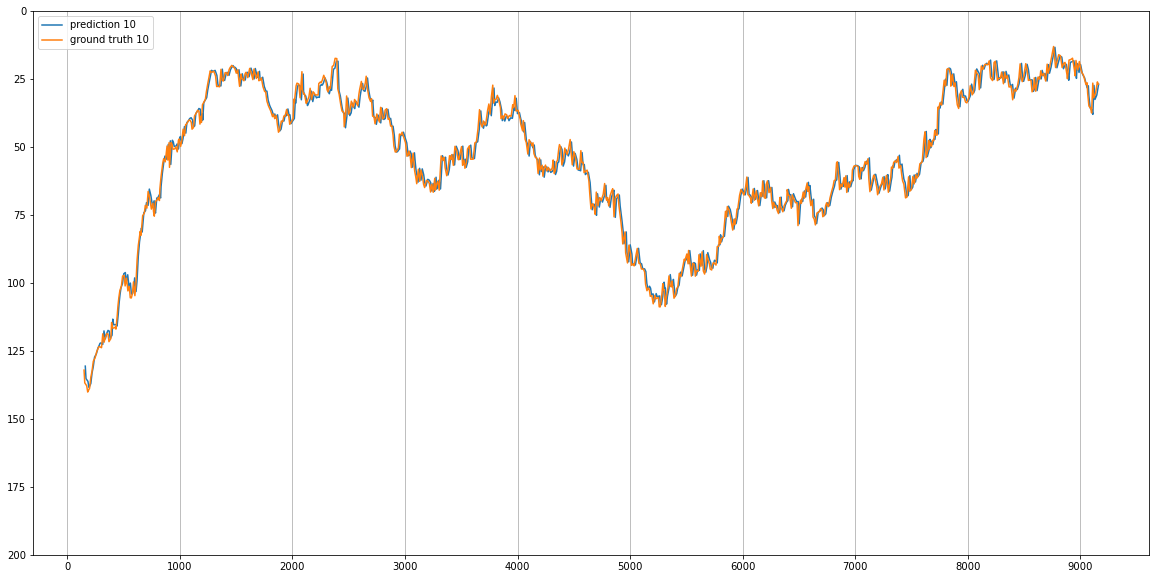

In [67]:
plot_prediction(data, pred_centre_df, ids=[centre_ids[-1]])

In [68]:
print(f'Top ids: {top_ids}')

Top ids: [0.0, 1.0, 2.0, 3.0, 4.0]


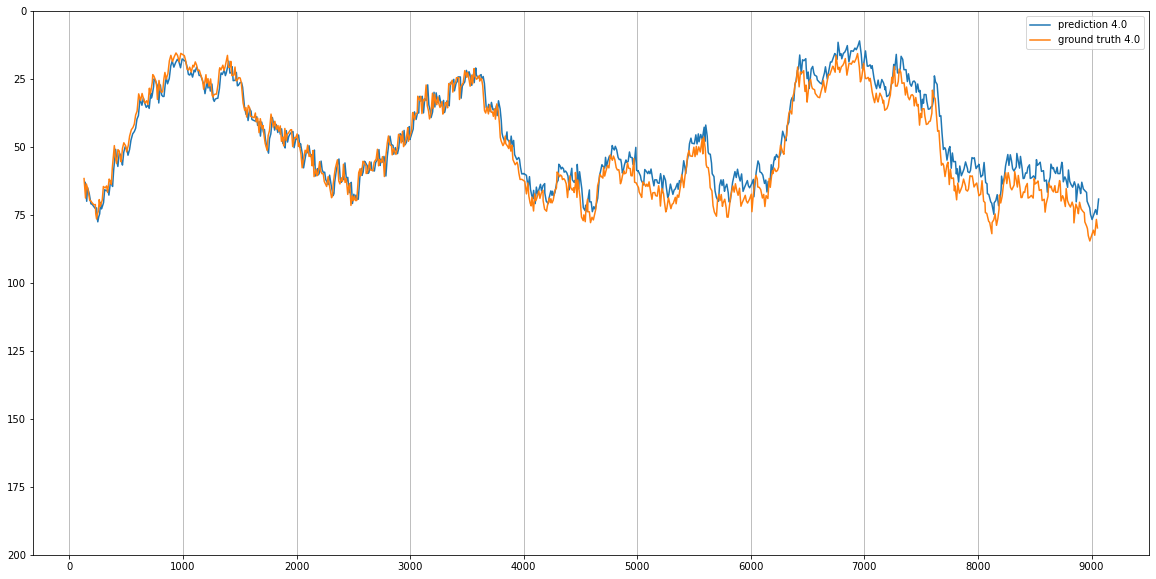

In [69]:
plot_prediction(data, pred_top_df, ids=[top_ids[-1]])

In [70]:
print(f'Bottom ids: {bottom_ids}')

Bottom ids: [9.0, 11.0, 12.0, 13.0, 14.0]


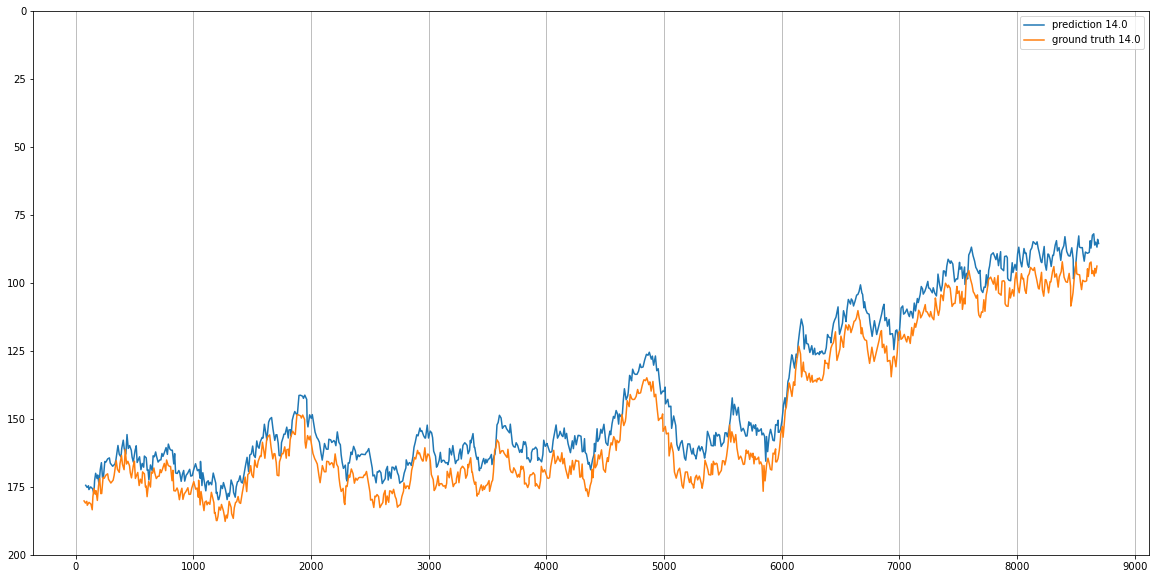

In [71]:
plot_prediction(data, pred_bottom_df, ids=[bottom_ids[-1]])

**Train on bottom**

In [72]:
lin_model = LinearRegression()
lin_model.fit(X_bottom, X_bottom)

print("The model performance for training set (bottom)")
bottom_pred = evaluate(X_bottom, y_bottom, lin_model)

print("The model performance for testing set (centre)")
centre_pred = evaluate(X_centre, y_centre, lin_model)

print("The model performance for testing set (top)")
top_pred = evaluate(X_top, y_top, lin_model)

The model performance for training set (bottom)
--------------------------------------
RMSE is 8.473243898917952
R2 score is 0.9814422797040983


The model performance for testing set (centre)
--------------------------------------
RMSE is 8.626416563199392
R2 score is 0.9911342251604113


The model performance for testing set (top)
--------------------------------------
RMSE is 8.637986630862377
R2 score is 0.9873691487229118




In [73]:
pred_top_df = get_predictions_df(top_pred, top_ids)
pred_centre_df = get_predictions_df(centre_pred, centre_ids)
pred_bottom_df = get_predictions_df(bottom_pred, bottom_ids)

Prediction to dataframe: 100%|████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:04<00:00, 171.45it/s]


In [74]:
print(f'Bottom ids: {bottom_ids}')

Bottom ids: [9.0, 11.0, 12.0, 13.0, 14.0]


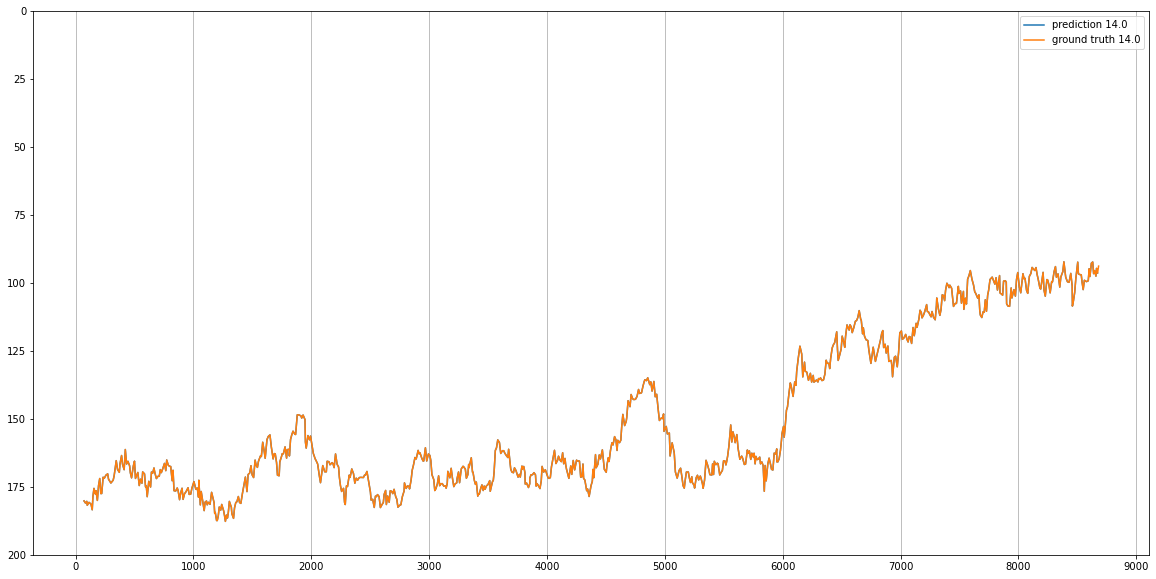

In [75]:
plot_prediction(data, pred_bottom_df, ids=[bottom_ids[-1]])

In [76]:
print(f'Centre ids: {centre_ids}')

Centre ids: [5, 6, 7, 8, 10]


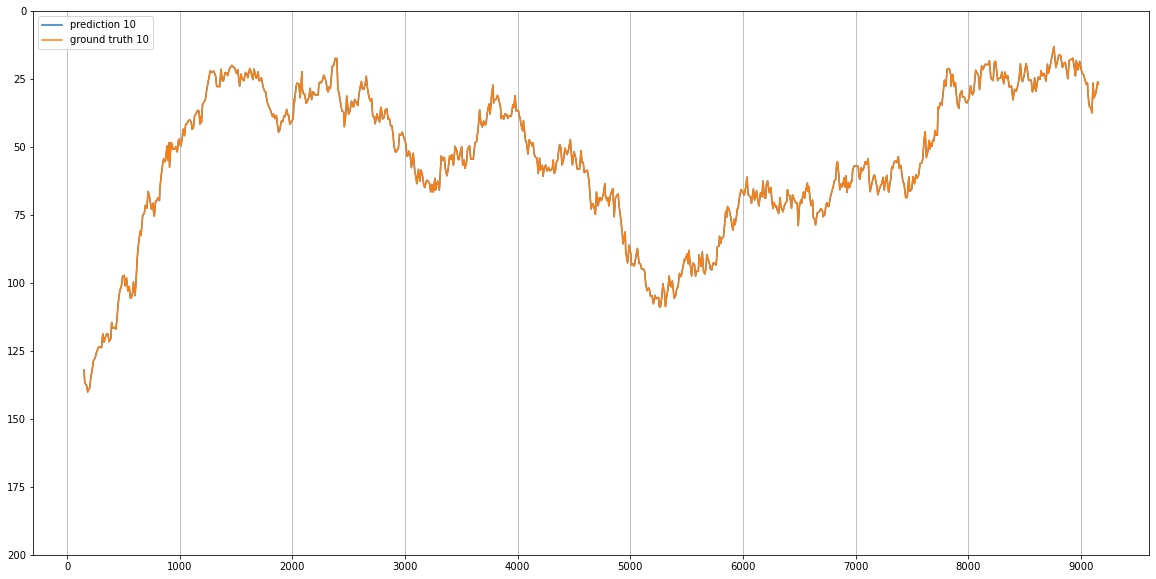

In [77]:
plot_prediction(data, pred_centre_df, ids=[centre_ids[-1]])

In [78]:
print(f'Top ids: {top_ids}')

Top ids: [0.0, 1.0, 2.0, 3.0, 4.0]


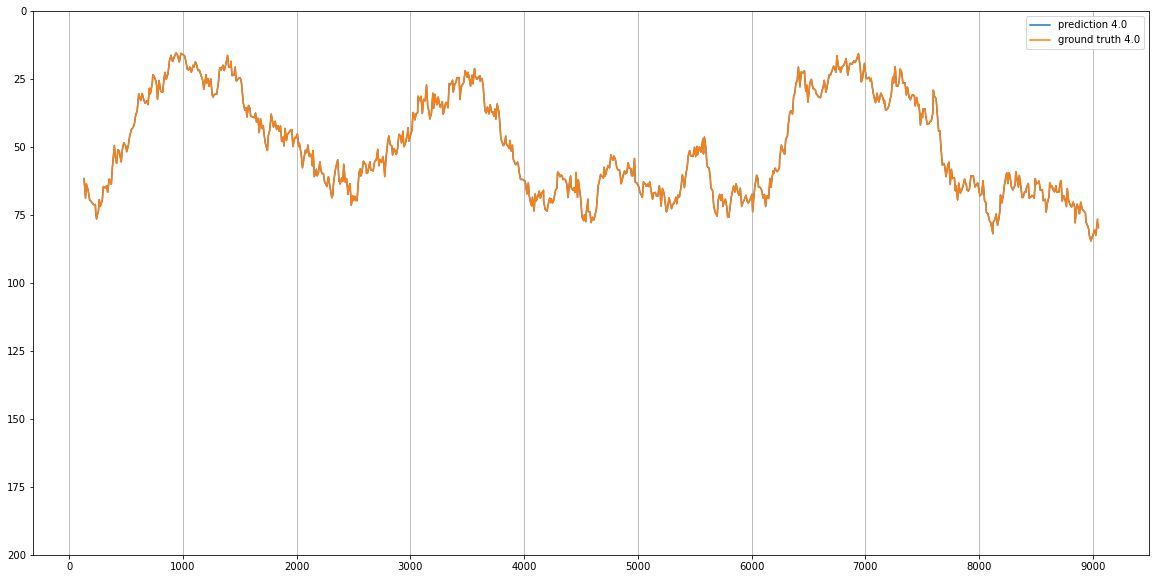

In [79]:
plot_prediction(data, pred_top_df, ids=[top_ids[-1]])